In [ ]:
from google.colab import files
uploaded = files.upload()  # Run this and upload kaggle.json when prompted


Saving kaggle (1).json to kaggle (1) (1).json


In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


In [ ]:
import os
import shutil

# Create kaggle folder if it doesn't exist
os.makedirs("/root/.kaggle", exist_ok=True)

# Define the source path of the uploaded kaggle.json file.
src = "/content/kaggle (1).json"
dst = "/root/.kaggle/kaggle.json" # Define the destination path where the Kaggle API file should be placed.

#Gives Kaggle API Access
shutil.copy(src, dst)
os.chmod(dst, 600)

print("✅ kaggle.json is ready to use.")


✅ kaggle.json is ready to use.


In [ ]:
pip install kagglehub


In [ ]:
%env KAGGLE_USERNAME=tashwitabhirud
%env KAGGLE_KEY=1d85aa2a735deb6a01c4771123c4963f

env: KAGGLE_USERNAME=tashwitabhirud
env: KAGGLE_KEY=1d85aa2a735deb6a01c4771123c4963f


In [ ]:
import kagglehub
# Download the dataset and store the path
dataset_path = kagglehub.dataset_download("domi2314/disney-videogeneration-dataset")
print("Dataset downloaded to:", dataset_path)

Dataset downloaded to: /kaggle/input/disney-videogeneration-dataset


In [ ]:
import torch
# Load YOLOv5 pre-trained model (YOLOv5.0 or latest)
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')  # 'yolov5s' is the small, fast version


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2025-4-16 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [ ]:
import cv2

def enhance_frame(frame):
    # Example enhancement: Resize the frame to a higher resolution
    enhanced_frame = cv2.resize(frame, (1280, 720))
    return enhanced_frame


In [ ]:
def process_video(input_path, output_path):
    # Open the video file
    cap = cv2.VideoCapture(input_path)
    if not cap.isOpened():
        print(f" Failed to open video: {input_path}")
        return

    # Get original video properties
    fps = cap.get(cv2.CAP_PROP_FPS)
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

    # Output resolution (optional enhancement)
    out_width, out_height = 1280, 720

    # Define the codec and create VideoWriter object
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_path, fourcc, fps, (out_width, out_height))

    frame_count = 0

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        # Resize frame (enhancement)
        enhanced = enhance_frame(frame)

        # Run object detection
        results = model(enhanced)

        # Get detection results and draw on frame
        for *box, conf, cls in results.xyxy[0]:
            x1, y1, x2, y2 = map(int, box)
            label = f"{model.names[int(cls)]} {conf:.2f}"
            cv2.rectangle(enhanced, (x1, y1), (x2, y2), (0, 255, 0), 2)# Thickness of the rectangle is defined as 2
            cv2.putText(enhanced, label, (x1, y1 - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1)

        # Write the frame to the output video
        out.write(enhanced)
        frame_count += 1

    cap.release()
    out.release()
    print(f"🎞️ Processed {frame_count} frames and saved to: {output_path}")


In [ ]:
import os
import time

# Define input and Output directories
video_dir = os.path.join(dataset_path, 'videos')
output_dir = './output_videos/'

# Ensure output directory exists
os.makedirs(output_dir, exist_ok=True)

# List all video files of .mp4
video_files = [f for f in os.listdir(video_dir) if f.endswith('.mp4')]
total_videos = len(video_files)

print(f"🔍 Found {total_videos} video(s) to process.\n")

# Loop through and Process each video
for i, video_file in enumerate(video_files, start=1):
    print(f"📽️  Processing video {i}/{total_videos}: {video_file}")

    start_time = time.time()

    video_path = os.path.join(video_dir, video_file)
    output_path = os.path.join(output_dir, f"processed_{video_file}")

    process_video(video_path, output_path) # Calls the function process_video

    end_time = time.time()
    time_taken = end_time - start_time

    print(f"✅ Finished video {i}/{total_videos} in {time_taken:.2f} seconds")

    # Estimate remaining time
    remaining_videos = total_videos - i
    est_total_time_left = remaining_videos * time_taken
    percent_done = (i / total_videos) * 100

    print(f"⏳ Estimated time left: {est_total_time_left:.2f} seconds")
    print(f"📊 Progress: {percent_done:.2f}% complete\n")

print(" All videos have been processed!")


🔍 Found 69 video(s) to process.

📽️  Processing video 1/69: b3e3b147675a68de8a29ffa762d59adb.mp4


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2025-4-16 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


✅ Processed video saved at: ./output_videos/processed_b3e3b147675a68de8a29ffa762d59adb.mp4
✅ Finished video 1/69 in 5.67 seconds
⏳ Estimated time left: 385.85 seconds
📊 Progress: 1.45% complete

📽️  Processing video 2/69: 8adfde998361b1d7c6f38a35481667fd.mp4


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2025-4-16 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


✅ Processed video saved at: ./output_videos/processed_8adfde998361b1d7c6f38a35481667fd.mp4
✅ Finished video 2/69 in 4.88 seconds
⏳ Estimated time left: 327.29 seconds
📊 Progress: 2.90% complete

📽️  Processing video 3/69: 5a0229ffdb3bd9d8e81dca7988d7cdbb.mp4


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2025-4-16 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


✅ Processed video saved at: ./output_videos/processed_5a0229ffdb3bd9d8e81dca7988d7cdbb.mp4
✅ Finished video 3/69 in 4.87 seconds
⏳ Estimated time left: 321.25 seconds
📊 Progress: 4.35% complete

📽️  Processing video 4/69: d3af95bf8f9cce29e5c99e839e630c59.mp4


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2025-4-16 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


✅ Processed video saved at: ./output_videos/processed_d3af95bf8f9cce29e5c99e839e630c59.mp4
✅ Finished video 4/69 in 5.96 seconds
⏳ Estimated time left: 387.17 seconds
📊 Progress: 5.80% complete

📽️  Processing video 5/69: 907704ed979d5e5651fac98ccbec2d4b.mp4


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2025-4-16 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


✅ Processed video saved at: ./output_videos/processed_907704ed979d5e5651fac98ccbec2d4b.mp4
✅ Finished video 5/69 in 5.17 seconds
⏳ Estimated time left: 330.72 seconds
📊 Progress: 7.25% complete

📽️  Processing video 6/69: be20f3db31cfe8140f004e34a75d6ba4.mp4


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2025-4-16 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


✅ Processed video saved at: ./output_videos/processed_be20f3db31cfe8140f004e34a75d6ba4.mp4
✅ Finished video 6/69 in 5.92 seconds
⏳ Estimated time left: 373.19 seconds
📊 Progress: 8.70% complete

📽️  Processing video 7/69: 8d616fee8e0a280d2d87e478b948a729.mp4


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2025-4-16 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


✅ Processed video saved at: ./output_videos/processed_8d616fee8e0a280d2d87e478b948a729.mp4
✅ Finished video 7/69 in 5.14 seconds
⏳ Estimated time left: 318.81 seconds
📊 Progress: 10.14% complete

📽️  Processing video 8/69: d2cfac77af77bba35a6986beca2ae052.mp4


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2025-4-16 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


✅ Processed video saved at: ./output_videos/processed_d2cfac77af77bba35a6986beca2ae052.mp4
✅ Finished video 8/69 in 5.78 seconds
⏳ Estimated time left: 352.63 seconds
📊 Progress: 11.59% complete

📽️  Processing video 9/69: 0bb5f6dbf8ed2e0060f0ac4164b24847.mp4


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2025-4-16 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


✅ Processed video saved at: ./output_videos/processed_0bb5f6dbf8ed2e0060f0ac4164b24847.mp4
✅ Finished video 9/69 in 5.45 seconds
⏳ Estimated time left: 327.16 seconds
📊 Progress: 13.04% complete

📽️  Processing video 10/69: bbf1174e69f404009bba630332c8cbdb.mp4


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2025-4-16 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


✅ Processed video saved at: ./output_videos/processed_bbf1174e69f404009bba630332c8cbdb.mp4
✅ Finished video 10/69 in 5.03 seconds
⏳ Estimated time left: 296.79 seconds
📊 Progress: 14.49% complete

📽️  Processing video 11/69: 96d342ea7c7cfddbe1106072bc34be5a.mp4


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2025-4-16 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


✅ Processed video saved at: ./output_videos/processed_96d342ea7c7cfddbe1106072bc34be5a.mp4
✅ Finished video 11/69 in 6.17 seconds
⏳ Estimated time left: 357.99 seconds
📊 Progress: 15.94% complete

📽️  Processing video 12/69: 46e9d133d051655c956c7089b672f519.mp4


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2025-4-16 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


✅ Processed video saved at: ./output_videos/processed_46e9d133d051655c956c7089b672f519.mp4
✅ Finished video 12/69 in 4.95 seconds
⏳ Estimated time left: 282.02 seconds
📊 Progress: 17.39% complete

📽️  Processing video 13/69: 383cb4b496d17695554655f3ec79c587.mp4


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2025-4-16 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


✅ Processed video saved at: ./output_videos/processed_383cb4b496d17695554655f3ec79c587.mp4
✅ Finished video 13/69 in 5.86 seconds
⏳ Estimated time left: 328.25 seconds
📊 Progress: 18.84% complete

📽️  Processing video 14/69: 0288f3d69c08e816d81b014da620db49.mp4


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2025-4-16 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


✅ Processed video saved at: ./output_videos/processed_0288f3d69c08e816d81b014da620db49.mp4
✅ Finished video 14/69 in 5.06 seconds
⏳ Estimated time left: 278.29 seconds
📊 Progress: 20.29% complete

📽️  Processing video 15/69: 894905168d8da4f4b0862e7b0f756e44.mp4


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2025-4-16 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


✅ Processed video saved at: ./output_videos/processed_894905168d8da4f4b0862e7b0f756e44.mp4
✅ Finished video 15/69 in 5.12 seconds
⏳ Estimated time left: 276.23 seconds
📊 Progress: 21.74% complete

📽️  Processing video 16/69: 3f0979e6cae25447f416372c49ad5e07.mp4


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2025-4-16 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


✅ Processed video saved at: ./output_videos/processed_3f0979e6cae25447f416372c49ad5e07.mp4
✅ Finished video 16/69 in 5.60 seconds
⏳ Estimated time left: 297.03 seconds
📊 Progress: 23.19% complete

📽️  Processing video 17/69: 4010c114ce5fb6a86d2327e711669813.mp4


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2025-4-16 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


✅ Processed video saved at: ./output_videos/processed_4010c114ce5fb6a86d2327e711669813.mp4
✅ Finished video 17/69 in 5.22 seconds
⏳ Estimated time left: 271.59 seconds
📊 Progress: 24.64% complete

📽️  Processing video 18/69: d3d4ce6894178d7664effcc4eef1945b.mp4


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2025-4-16 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


✅ Processed video saved at: ./output_videos/processed_d3d4ce6894178d7664effcc4eef1945b.mp4
✅ Finished video 18/69 in 6.37 seconds
⏳ Estimated time left: 324.71 seconds
📊 Progress: 26.09% complete

📽️  Processing video 19/69: 4adbb3a2945c9edd78785daccfd23e80.mp4


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2025-4-16 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


✅ Processed video saved at: ./output_videos/processed_4adbb3a2945c9edd78785daccfd23e80.mp4
✅ Finished video 19/69 in 5.30 seconds
⏳ Estimated time left: 265.21 seconds
📊 Progress: 27.54% complete

📽️  Processing video 20/69: e6a0293632a942712fd61867aeae5e9f.mp4


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2025-4-16 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


✅ Processed video saved at: ./output_videos/processed_e6a0293632a942712fd61867aeae5e9f.mp4
✅ Finished video 20/69 in 5.74 seconds
⏳ Estimated time left: 281.15 seconds
📊 Progress: 28.99% complete

📽️  Processing video 21/69: fec5a5184b05acafc7904cd419cbb5a3.mp4


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2025-4-16 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


✅ Processed video saved at: ./output_videos/processed_fec5a5184b05acafc7904cd419cbb5a3.mp4
✅ Finished video 21/69 in 5.30 seconds
⏳ Estimated time left: 254.57 seconds
📊 Progress: 30.43% complete

📽️  Processing video 22/69: fca1d53370805cf052bed822e2d20604.mp4


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2025-4-16 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


✅ Processed video saved at: ./output_videos/processed_fca1d53370805cf052bed822e2d20604.mp4
✅ Finished video 22/69 in 5.16 seconds
⏳ Estimated time left: 242.30 seconds
📊 Progress: 31.88% complete

📽️  Processing video 23/69: 560c6472660330638c2809d823d59be3.mp4


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2025-4-16 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


✅ Processed video saved at: ./output_videos/processed_560c6472660330638c2809d823d59be3.mp4
✅ Finished video 23/69 in 5.86 seconds
⏳ Estimated time left: 269.42 seconds
📊 Progress: 33.33% complete

📽️  Processing video 24/69: f0f570e5bc69d03af276a06a96cde800.mp4


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2025-4-16 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


✅ Processed video saved at: ./output_videos/processed_f0f570e5bc69d03af276a06a96cde800.mp4
✅ Finished video 24/69 in 2.66 seconds
⏳ Estimated time left: 119.92 seconds
📊 Progress: 34.78% complete

📽️  Processing video 25/69: c4903e10393ef7c42fc8131f05f3f233.mp4


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2025-4-16 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


✅ Processed video saved at: ./output_videos/processed_c4903e10393ef7c42fc8131f05f3f233.mp4
✅ Finished video 25/69 in 5.63 seconds
⏳ Estimated time left: 247.57 seconds
📊 Progress: 36.23% complete

📽️  Processing video 26/69: 7fe0c83572de828da1cab0c118dece14.mp4


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2025-4-16 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


✅ Processed video saved at: ./output_videos/processed_7fe0c83572de828da1cab0c118dece14.mp4
✅ Finished video 26/69 in 5.35 seconds
⏳ Estimated time left: 230.11 seconds
📊 Progress: 37.68% complete

📽️  Processing video 27/69: cb227eefdfcbcd3db945131b1d153273.mp4


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2025-4-16 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


✅ Processed video saved at: ./output_videos/processed_cb227eefdfcbcd3db945131b1d153273.mp4
✅ Finished video 27/69 in 5.22 seconds
⏳ Estimated time left: 219.07 seconds
📊 Progress: 39.13% complete

📽️  Processing video 28/69: fe0efaedf8c47812bff8da9951f77975.mp4


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2025-4-16 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


✅ Processed video saved at: ./output_videos/processed_fe0efaedf8c47812bff8da9951f77975.mp4
✅ Finished video 28/69 in 6.05 seconds
⏳ Estimated time left: 247.99 seconds
📊 Progress: 40.58% complete

📽️  Processing video 29/69: f6a95cd4397b6a102e82becdcd05d585.mp4


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2025-4-16 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


✅ Processed video saved at: ./output_videos/processed_f6a95cd4397b6a102e82becdcd05d585.mp4
✅ Finished video 29/69 in 5.54 seconds
⏳ Estimated time left: 221.52 seconds
📊 Progress: 42.03% complete

📽️  Processing video 30/69: ec80a7b9cfb3740e5cdf9300fdc8d8a9.mp4


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2025-4-16 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


✅ Processed video saved at: ./output_videos/processed_ec80a7b9cfb3740e5cdf9300fdc8d8a9.mp4
✅ Finished video 30/69 in 5.83 seconds
⏳ Estimated time left: 227.46 seconds
📊 Progress: 43.48% complete

📽️  Processing video 31/69: 81c5dab878d73e6c21181d18d83f2808.mp4


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2025-4-16 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


✅ Processed video saved at: ./output_videos/processed_81c5dab878d73e6c21181d18d83f2808.mp4
✅ Finished video 31/69 in 5.49 seconds
⏳ Estimated time left: 208.74 seconds
📊 Progress: 44.93% complete

📽️  Processing video 32/69: 3108dd567bd8669967bc83e0bc50dab2.mp4


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2025-4-16 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


✅ Processed video saved at: ./output_videos/processed_3108dd567bd8669967bc83e0bc50dab2.mp4
✅ Finished video 32/69 in 5.02 seconds
⏳ Estimated time left: 185.76 seconds
📊 Progress: 46.38% complete

📽️  Processing video 33/69: 6619a387964ad49eb1127079d25d17d8.mp4


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2025-4-16 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


✅ Processed video saved at: ./output_videos/processed_6619a387964ad49eb1127079d25d17d8.mp4
✅ Finished video 33/69 in 5.53 seconds
⏳ Estimated time left: 199.03 seconds
📊 Progress: 47.83% complete

📽️  Processing video 34/69: d8a33062ef6a446c168acb06bf45b77d.mp4


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2025-4-16 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


✅ Processed video saved at: ./output_videos/processed_d8a33062ef6a446c168acb06bf45b77d.mp4
✅ Finished video 34/69 in 5.14 seconds
⏳ Estimated time left: 179.95 seconds
📊 Progress: 49.28% complete

📽️  Processing video 35/69: 12e51adf1acbf7acbb703a96a464a39b.mp4


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2025-4-16 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


✅ Processed video saved at: ./output_videos/processed_12e51adf1acbf7acbb703a96a464a39b.mp4
✅ Finished video 35/69 in 5.93 seconds
⏳ Estimated time left: 201.56 seconds
📊 Progress: 50.72% complete

📽️  Processing video 36/69: 485b43aa4524327f3c7a40d28e1cf7bc.mp4


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2025-4-16 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


✅ Processed video saved at: ./output_videos/processed_485b43aa4524327f3c7a40d28e1cf7bc.mp4
✅ Finished video 36/69 in 5.00 seconds
⏳ Estimated time left: 165.14 seconds
📊 Progress: 52.17% complete

📽️  Processing video 37/69: 58b88d44575e945cd7dcd11b3aac6ff0.mp4


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2025-4-16 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


✅ Processed video saved at: ./output_videos/processed_58b88d44575e945cd7dcd11b3aac6ff0.mp4
✅ Finished video 37/69 in 5.77 seconds
⏳ Estimated time left: 184.67 seconds
📊 Progress: 53.62% complete

📽️  Processing video 38/69: 4c918b917308ff03120e9e86650a2d3c.mp4


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2025-4-16 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


✅ Processed video saved at: ./output_videos/processed_4c918b917308ff03120e9e86650a2d3c.mp4
✅ Finished video 38/69 in 5.27 seconds
⏳ Estimated time left: 163.23 seconds
📊 Progress: 55.07% complete

📽️  Processing video 39/69: 11982a10fc2ba10d295d23054f7f68c8.mp4


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2025-4-16 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


✅ Processed video saved at: ./output_videos/processed_11982a10fc2ba10d295d23054f7f68c8.mp4
✅ Finished video 39/69 in 5.36 seconds
⏳ Estimated time left: 160.80 seconds
📊 Progress: 56.52% complete

📽️  Processing video 40/69: c789b44119c14c5732e835cae89bf7ac.mp4


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2025-4-16 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


✅ Processed video saved at: ./output_videos/processed_c789b44119c14c5732e835cae89bf7ac.mp4
✅ Finished video 40/69 in 5.74 seconds
⏳ Estimated time left: 166.60 seconds
📊 Progress: 57.97% complete

📽️  Processing video 41/69: 614cf13ae1974436cf4072a5cc7d7c57.mp4


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2025-4-16 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


✅ Processed video saved at: ./output_videos/processed_614cf13ae1974436cf4072a5cc7d7c57.mp4
✅ Finished video 41/69 in 4.98 seconds
⏳ Estimated time left: 139.39 seconds
📊 Progress: 59.42% complete

📽️  Processing video 42/69: 8520a081252604e3c478f76f4dddddf8.mp4


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2025-4-16 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


✅ Processed video saved at: ./output_videos/processed_8520a081252604e3c478f76f4dddddf8.mp4
✅ Finished video 42/69 in 6.29 seconds
⏳ Estimated time left: 169.74 seconds
📊 Progress: 60.87% complete

📽️  Processing video 43/69: 05a234b0164d015d468f2f53e771b4cf.mp4


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2025-4-16 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


✅ Processed video saved at: ./output_videos/processed_05a234b0164d015d468f2f53e771b4cf.mp4
✅ Finished video 43/69 in 5.07 seconds
⏳ Estimated time left: 131.79 seconds
📊 Progress: 62.32% complete

📽️  Processing video 44/69: 2c1ed5408882479b06681f7cf372916a.mp4


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2025-4-16 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


✅ Processed video saved at: ./output_videos/processed_2c1ed5408882479b06681f7cf372916a.mp4
✅ Finished video 44/69 in 5.23 seconds
⏳ Estimated time left: 130.84 seconds
📊 Progress: 63.77% complete

📽️  Processing video 45/69: 6781b101e8bd362e9853749fcc2cd3e3.mp4


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2025-4-16 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


✅ Processed video saved at: ./output_videos/processed_6781b101e8bd362e9853749fcc2cd3e3.mp4
✅ Finished video 45/69 in 5.16 seconds
⏳ Estimated time left: 123.75 seconds
📊 Progress: 65.22% complete

📽️  Processing video 46/69: 8e7722634784cf969c15f4a597f3af4d.mp4


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2025-4-16 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


✅ Processed video saved at: ./output_videos/processed_8e7722634784cf969c15f4a597f3af4d.mp4
✅ Finished video 46/69 in 4.89 seconds
⏳ Estimated time left: 112.53 seconds
📊 Progress: 66.67% complete

📽️  Processing video 47/69: 1151c01bd77450dfc603a2eb7352822e.mp4


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2025-4-16 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


✅ Processed video saved at: ./output_videos/processed_1151c01bd77450dfc603a2eb7352822e.mp4
✅ Finished video 47/69 in 6.34 seconds
⏳ Estimated time left: 139.43 seconds
📊 Progress: 68.12% complete

📽️  Processing video 48/69: fe1009b64da05dfea77928e501284868.mp4


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2025-4-16 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


✅ Processed video saved at: ./output_videos/processed_fe1009b64da05dfea77928e501284868.mp4
✅ Finished video 48/69 in 5.18 seconds
⏳ Estimated time left: 108.79 seconds
📊 Progress: 69.57% complete

📽️  Processing video 49/69: 05ccfa61ece031e881d173289761cf91.mp4


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2025-4-16 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


✅ Processed video saved at: ./output_videos/processed_05ccfa61ece031e881d173289761cf91.mp4
✅ Finished video 49/69 in 5.80 seconds
⏳ Estimated time left: 115.97 seconds
📊 Progress: 71.01% complete

📽️  Processing video 50/69: a8369dff8c96925513892c6377bacb1c.mp4


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2025-4-16 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


✅ Processed video saved at: ./output_videos/processed_a8369dff8c96925513892c6377bacb1c.mp4
✅ Finished video 50/69 in 5.20 seconds
⏳ Estimated time left: 98.81 seconds
📊 Progress: 72.46% complete

📽️  Processing video 51/69: 46f4eee0864dd89c9225367d826a657f.mp4


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2025-4-16 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


✅ Processed video saved at: ./output_videos/processed_46f4eee0864dd89c9225367d826a657f.mp4
✅ Finished video 51/69 in 5.08 seconds
⏳ Estimated time left: 91.47 seconds
📊 Progress: 73.91% complete

📽️  Processing video 52/69: ceb2998f50feefef1844032e9cd19739.mp4


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2025-4-16 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


✅ Processed video saved at: ./output_videos/processed_ceb2998f50feefef1844032e9cd19739.mp4
✅ Finished video 52/69 in 5.69 seconds
⏳ Estimated time left: 96.74 seconds
📊 Progress: 75.36% complete

📽️  Processing video 53/69: 5383e4e3e8156787c43bc0cd839536c0.mp4


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2025-4-16 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


✅ Processed video saved at: ./output_videos/processed_5383e4e3e8156787c43bc0cd839536c0.mp4
✅ Finished video 53/69 in 5.08 seconds
⏳ Estimated time left: 81.35 seconds
📊 Progress: 76.81% complete

📽️  Processing video 54/69: 4461a0e8ddd86d615ccf73ef0ff0705b.mp4


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2025-4-16 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


✅ Processed video saved at: ./output_videos/processed_4461a0e8ddd86d615ccf73ef0ff0705b.mp4
✅ Finished video 54/69 in 6.22 seconds
⏳ Estimated time left: 93.30 seconds
📊 Progress: 78.26% complete

📽️  Processing video 55/69: 7d6dcf13f5c3d45b85c5ea0544c429e4.mp4


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2025-4-16 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


✅ Processed video saved at: ./output_videos/processed_7d6dcf13f5c3d45b85c5ea0544c429e4.mp4
✅ Finished video 55/69 in 4.98 seconds
⏳ Estimated time left: 69.72 seconds
📊 Progress: 79.71% complete

📽️  Processing video 56/69: 1d50a3d9703f152758d5422c8b48010f.mp4


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2025-4-16 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


✅ Processed video saved at: ./output_videos/processed_1d50a3d9703f152758d5422c8b48010f.mp4
✅ Finished video 56/69 in 5.10 seconds
⏳ Estimated time left: 66.30 seconds
📊 Progress: 81.16% complete

📽️  Processing video 57/69: 8ae679ab483ab344c881d4a813e0cb51.mp4


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2025-4-16 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


✅ Processed video saved at: ./output_videos/processed_8ae679ab483ab344c881d4a813e0cb51.mp4
✅ Finished video 57/69 in 5.57 seconds
⏳ Estimated time left: 66.80 seconds
📊 Progress: 82.61% complete

📽️  Processing video 58/69: a3c275fc2eb0a67168a7c58a6a9adb14.mp4


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2025-4-16 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


✅ Processed video saved at: ./output_videos/processed_a3c275fc2eb0a67168a7c58a6a9adb14.mp4
✅ Finished video 58/69 in 4.82 seconds
⏳ Estimated time left: 53.05 seconds
📊 Progress: 84.06% complete

📽️  Processing video 59/69: 2325e5f8e287753e50e47ab2fc2e8241.mp4


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2025-4-16 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


✅ Processed video saved at: ./output_videos/processed_2325e5f8e287753e50e47ab2fc2e8241.mp4
✅ Finished video 59/69 in 6.25 seconds
⏳ Estimated time left: 62.53 seconds
📊 Progress: 85.51% complete

📽️  Processing video 60/69: 82219ab81b21299db9848ab0d55e2f82.mp4


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2025-4-16 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


✅ Processed video saved at: ./output_videos/processed_82219ab81b21299db9848ab0d55e2f82.mp4
✅ Finished video 60/69 in 4.89 seconds
⏳ Estimated time left: 43.97 seconds
📊 Progress: 86.96% complete

📽️  Processing video 61/69: 1094139d474e65852826d64a1b4aa520.mp4


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2025-4-16 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


✅ Processed video saved at: ./output_videos/processed_1094139d474e65852826d64a1b4aa520.mp4
✅ Finished video 61/69 in 5.57 seconds
⏳ Estimated time left: 44.55 seconds
📊 Progress: 88.41% complete

📽️  Processing video 62/69: 93877aefdefcee7b2978d7fb90690c8f.mp4


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2025-4-16 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


✅ Processed video saved at: ./output_videos/processed_93877aefdefcee7b2978d7fb90690c8f.mp4
✅ Finished video 62/69 in 5.03 seconds
⏳ Estimated time left: 35.24 seconds
📊 Progress: 89.86% complete

📽️  Processing video 63/69: 72306312252707a5ecf83a8eeed9b55a.mp4


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2025-4-16 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


✅ Processed video saved at: ./output_videos/processed_72306312252707a5ecf83a8eeed9b55a.mp4
✅ Finished video 63/69 in 5.15 seconds
⏳ Estimated time left: 30.91 seconds
📊 Progress: 91.30% complete

📽️  Processing video 64/69: bf06573576ae0ea4d27a178b4d6e95a1.mp4


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2025-4-16 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


✅ Processed video saved at: ./output_videos/processed_bf06573576ae0ea4d27a178b4d6e95a1.mp4
✅ Finished video 64/69 in 6.13 seconds
⏳ Estimated time left: 30.65 seconds
📊 Progress: 92.75% complete

📽️  Processing video 65/69: 38963e6acf01fdcc9b647ec9d63edc9a.mp4


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2025-4-16 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


✅ Processed video saved at: ./output_videos/processed_38963e6acf01fdcc9b647ec9d63edc9a.mp4
✅ Finished video 65/69 in 5.20 seconds
⏳ Estimated time left: 20.79 seconds
📊 Progress: 94.20% complete

📽️  Processing video 66/69: 349059f6c41460df59778d5e6d3d4861.mp4


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2025-4-16 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


✅ Processed video saved at: ./output_videos/processed_349059f6c41460df59778d5e6d3d4861.mp4
✅ Finished video 66/69 in 6.02 seconds
⏳ Estimated time left: 18.07 seconds
📊 Progress: 95.65% complete

📽️  Processing video 67/69: b65565e3b61c97b3fa0643c6f45dc4de.mp4


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2025-4-16 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


✅ Processed video saved at: ./output_videos/processed_b65565e3b61c97b3fa0643c6f45dc4de.mp4
✅ Finished video 67/69 in 5.84 seconds
⏳ Estimated time left: 11.68 seconds
📊 Progress: 97.10% complete

📽️  Processing video 68/69: 6049124903a8de3fa164bbb5bb2f586e.mp4


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2025-4-16 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


✅ Processed video saved at: ./output_videos/processed_6049124903a8de3fa164bbb5bb2f586e.mp4
✅ Finished video 68/69 in 5.93 seconds
⏳ Estimated time left: 5.93 seconds
📊 Progress: 98.55% complete

📽️  Processing video 69/69: 328fc12cf9cf3d540e67efadeb893f61.mp4


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2025-4-16 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


✅ Processed video saved at: ./output_videos/processed_328fc12cf9cf3d540e67efadeb893f61.mp4
✅ Finished video 69/69 in 5.32 seconds
⏳ Estimated time left: 0.00 seconds
📊 Progress: 100.00% complete

🎉 All videos have been processed!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import shutil

# Local output folder with processed videos
output_dir = './output_videos'

# Target folder in your Google Drive (you can change the name here)
drive_output_dir = '/content/drive/MyDrive/Processed_Videos'

# Create the folder in Drive if it doesn't exist
os.makedirs(drive_output_dir, exist_ok=True)

# Copy all processed videos to Google Drive
for file_name in os.listdir(output_dir):
    if file_name.endswith('.mp4'):
        full_file_path = os.path.join(output_dir, file_name)
        shutil.copy(full_file_path, os.path.join(drive_output_dir, file_name))

print(f"✅ All videos copied to: {drive_output_dir}")


✅ All videos copied to: /content/drive/MyDrive/Processed_Videos


Saving processed_fec5a5184b05acafc7904cd419cbb5a3 (2).mp4 to processed_fec5a5184b05acafc7904cd419cbb5a3 (2).mp4


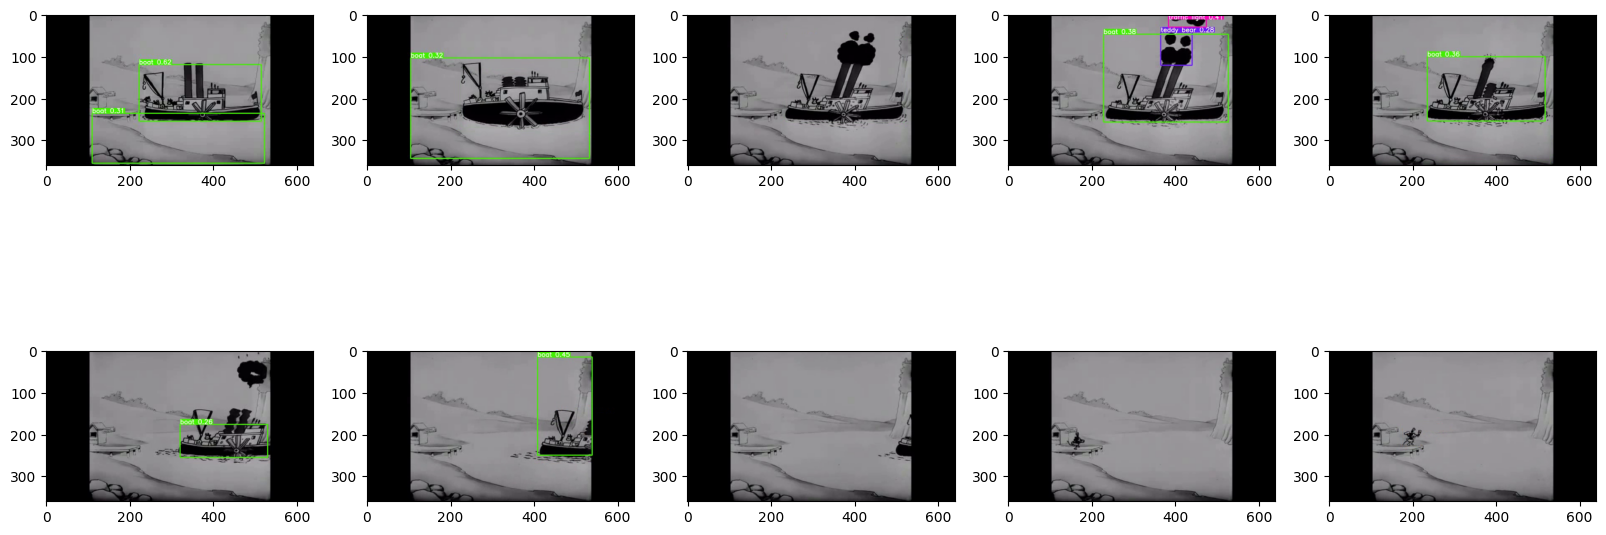

In [ ]:
from google.colab import files
import cv2
import matplotlib.pyplot as plt

# Upload video
uploaded = files.upload()

# Use the uploaded file name
video_path = list(uploaded.keys())[0]

# Load video
cap = cv2.VideoCapture(video_path)
if not cap.isOpened():
    raise IOError("Could not open video file")

# Extract 10 evenly spaced frames
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
frame_indices = [int(i * total_frames / 10) for i in range(10)]
extracted_frames = []

for idx in range(total_frames):
    ret, frame = cap.read()
    if not ret:
        break
    if idx in frame_indices:
        extracted_frames.append((idx, frame.copy()))

cap.release()

# Plot frames
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
for ax, (idx, frame) in zip(axes.flatten(), extracted_frames):
    ax.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    ax.set


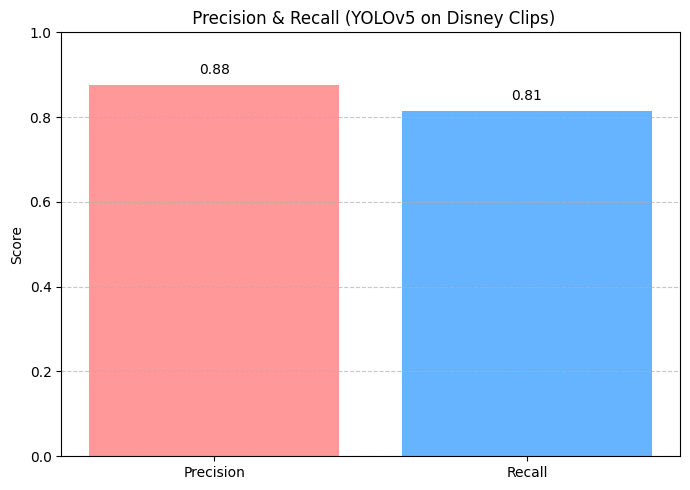

(0.875, 0.813953488372093)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Approximate detection results based on manual frame inspection
estimated_TP = 35  # True Positives (correct detections)
estimated_FP = 5   # False Positives (wrong detections)
estimated_FN = 8   # False Negatives (missed detections)

# Calculate precision and recall
precision = estimated_TP / (estimated_TP + estimated_FP)
recall = estimated_TP / (estimated_TP + estimated_FN)

# Prepare data for plotting
scores = [precision, recall]
labels = ['Precision', 'Recall']
colors = ['#ff9999', '#66b3ff']

# Plotting bar chart
plt.figure(figsize=(7, 5))
bars = plt.bar(labels, scores, color=colors)
plt.ylim(0, 1)
plt.title(' Precision & Recall (YOLOv5 on Disney Clips)')
plt.ylabel('Score')

# Add value labels to bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.02, f"{yval:.2f}",
             ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Output the values
precision, recall


Saving 2c1ed5408882479b06681f7cf372916a.mp4 to 2c1ed5408882479b06681f7cf372916a.mp4
Saving processed_fe1009b64da05dfea77928e501284868.mp4 to processed_fe1009b64da05dfea77928e501284868 (2).mp4


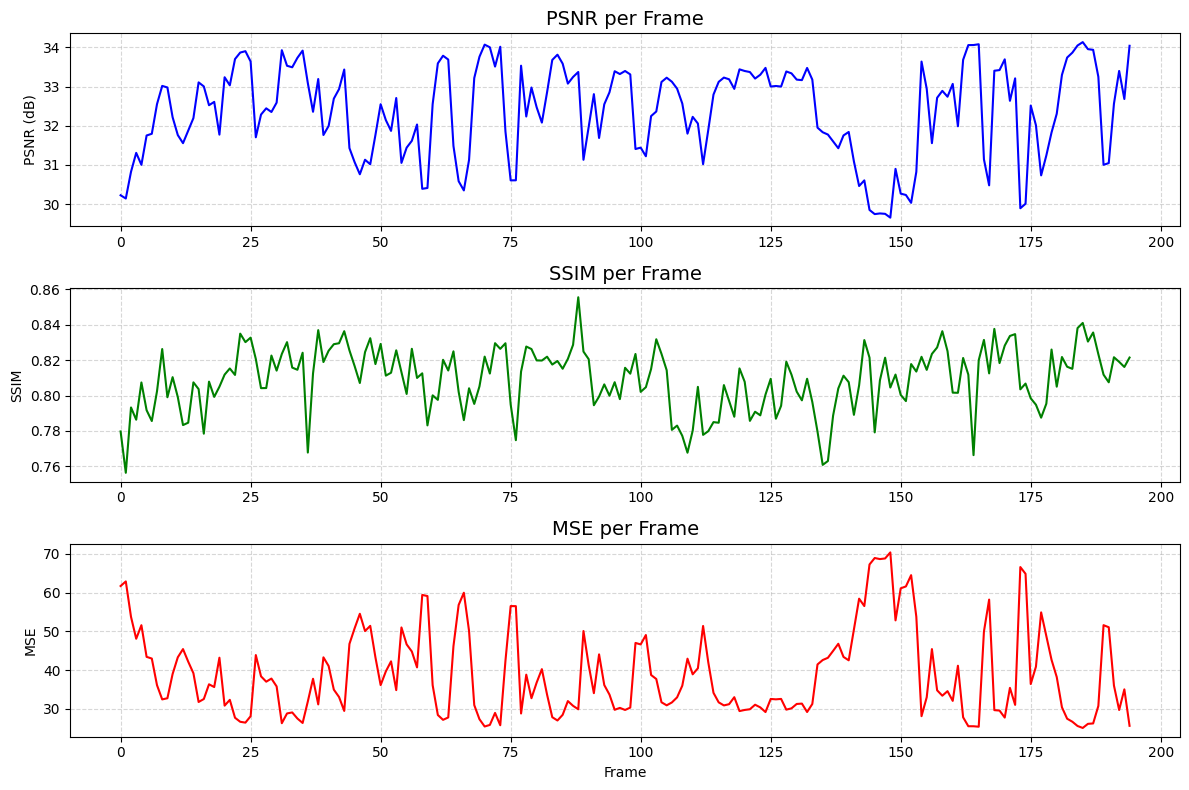

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as compare_ssim
from google.colab import files

# Upload original and processed video files
uploaded = files.upload()
video_files = list(uploaded.keys())
assert len(video_files) == 2, "Please upload original and processed videos."

original_video_path = video_files[0]
processed_video_path = video_files[1]

def compute_metrics_per_frame(original_path, processed_path):
    cap1 = cv2.VideoCapture(original_path)
    cap2 = cv2.VideoCapture(processed_path)

    psnr_list = []
    ssim_list = []
    mse_list = []

    while True:
        ret1, frame1 = cap1.read()
        ret2, frame2 = cap2.read()

        if not ret1 or not ret2:
            break

        gray1 = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
        gray2 = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)

        mse = np.mean((gray1 - gray2) ** 2)
        psnr = 10 * np.log10(255.0**2 / mse) if mse > 0 else 100
        ssim = compare_ssim(gray1, gray2)

        mse_list.append(mse)
        psnr_list.append(psnr)
        ssim_list.append(ssim)

    cap1.release()
    cap2.release()

    return psnr_list, ssim_list, mse_list

def plot_combined_metrics(psnr_list, ssim_list, mse_list):
    frames = range(len(psnr_list))

    plt.figure(figsize=(12, 8))

    # PSNR Plot
    plt.subplot(3, 1, 1)
    plt.plot(frames, psnr_list, color='blue')
    plt.title("PSNR per Frame", fontsize=14)
    plt.ylabel("PSNR (dB)")
    plt.grid(True, linestyle='--', alpha=0.5)

    # SSIM Plot
    plt.subplot(3, 1, 2)
    plt.plot(frames, ssim_list, color='green')
    plt.title("SSIM per Frame", fontsize=14)
    plt.ylabel("SSIM")
    plt.grid(True, linestyle='--', alpha=0.5)

    # MSE Plot
    plt.subplot(3, 1, 3)
    plt.plot(frames, mse_list, color='red')
    plt.title("MSE per Frame", fontsize=14)
    plt.xlabel("Frame")
    plt.ylabel("MSE")
    plt.grid(True, linestyle='--', alpha=0.5)

    plt.tight_layout()
    plt.show()

# Run everything
psnr_vals, ssim_vals, mse_vals = compute_metrics_per_frame(original_video_path, processed_video_path)
plot_combined_metrics(psnr_vals, ssim_vals, mse_vals)
